# Allan plots - characterisation of IMU
Data collection on PX4 on pixhawk platform : 
 - switch the logger to to "new logger" (message logger, this will make it easier to achieve small log file):
    - edit the Firmware/cmake/configs/nuttx_px4fmu-v2_default.cmake around line 121. 
      Comment out the line:"modules/sdlog2" and uncomment the "modules/logger":
```
	#
	# Logging
	#
	modules/logger
	#modules/sdlog2
```
    - rebuild and flash
    - set the SYS_LOGGER parameter to new logger, reboot
    
 - We will need long log > 4h, 6-8 hours for good results, this would produce large file. 
   To limit that create/edit etc/logging/logger_topics.txt file on PX4 SD card with the following lines:
```python
sensor_gyro, 0
sensor_accel, 0
```
   This will log only those 2 types of messages
- Setup for long wait:
   - you will need large battery or power supply to last the duration
   - place where your setup will not be moved/touched
   - you can set the PWM_MIN to let say 800 avoid spinning motors
   - In my setup I had 4S battery 2x4000mAh=8Ah, the Pixhawk plus odroid running onboard take ~0.5A That lasted 9h before PX4 started to beep and complain of low battery.
   - I notice that my CPU fan on ODROID transfers vibration to PX4 especially on the Y axes, I believe it to be OK as it is fearly small.
   - Put monitor on battery with suuch a long "ride" it is easy to destroy battery (overdischarge it)

- Arm to start logging
- wait the time
- collect the *.ulg log from SD card
- use the ulog2csv utility to extract csv files
- now you can use it in the following script


In [2]:
%pylab inline
import px4tools
import pandas
import os
import pickle

Populating the interactive namespace from numpy and matplotlib


In [3]:
import px4tools.version
px4tools.version.git_revision

'ef4d00d967e186c6246698a7646c52fdee9ec831'

In [4]:
print('Loading dataset')
d_accel = px4tools.ulog.PX4MessageDict({'sensor_accel_0': 
                                        pandas.read_csv('/data/PX4_Logs/ImuStats/02_41_45_sensor_accel_0.csv')})['sensor_accel_0']
d_gyro = px4tools.ulog.PX4MessageDict({'sensor_gyro_0': 
                                       pandas.read_csv('/data/PX4_Logs/ImuStats/02_41_45_sensor_gyro_0.csv')})['sensor_gyro_0']
print('Loaded dataset')

Loading dataset
Loaded dataset


Starting analysis - Accelerometer
Accelerometer 0 - MPU6000


{'sensor_accel_0_randomwalk_correlation_time': [1890.1957056643951,
  16751.132771135974,
  12311.542493589959],
 'sensor_accel_0_sig_bi': [0.00082017380730088402,
  0.00054756190368426784,
  0.0019789587539571513],
 'sensor_accel_0_sig_rrw': [0.00010379500034730766,
  3.1074097353006157e-05,
  0.00039639951154507835],
 'sensor_accel_0_sig_rw': [0.001339636662215286,
  0.0014213207108307163,
  0.0019266925174342483],
 'sensor_accel_0_tau_0': [1, 1, 1],
 'sensor_accel_0_tau_1': [29.072627649253409,
  109.2731743105516,
  9.3489696516404983],
 'sensor_accel_0_tau_2': [209.43397364725396,
  1342.7418271234189,
  102.0667571634918]}

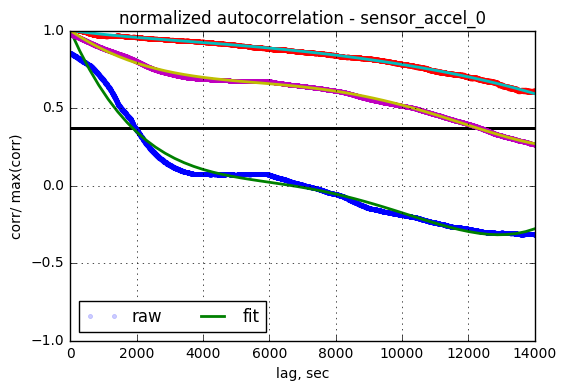

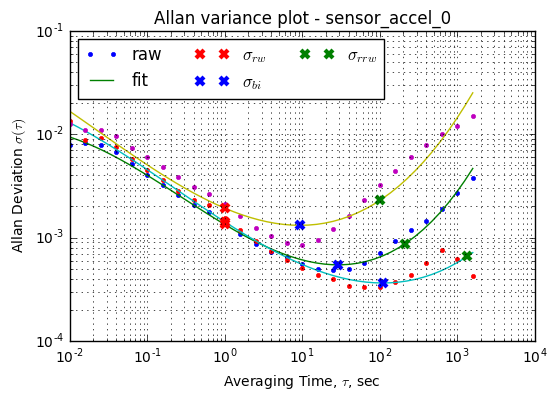

In [5]:
print('Starting analysis - Accelerometer')

print('Accelerometer 0 - MPU6000')
px4tools.ulog.noise_analysis_sensor(d_accel, topic='sensor_accel_0', 
                                    allan_args={'poly_order':3, 'min_intervals':15})

Starting analysis - Gyroscopes
Gyroscope 0 - MPU6000
failed to find tau_1
failed to find tau_1


{'sensor_gyro_0_randomwalk_correlation_time': [0,
  13472.333298442645,
  7165.3601797315423],
 'sensor_gyro_0_sig_bi': [nan, 4.2976478604180338e-05, nan],
 'sensor_gyro_0_sig_rrw': [0.00013976683884835508,
  4.8533768758360735e-07,
  0.00014318993007161098],
 'sensor_gyro_0_sig_rw': [0.0043477775431572411,
  0.0053160740503361767,
  0.0023499072880889013],
 'sensor_gyro_0_tau_0': [1215.8154486289561,
  1400.1884463486351,
  1018.299148859351],
 'sensor_gyro_0_tau_1': [nan, 9591.2349897028707, nan],
 'sensor_gyro_0_tau_2': [1, 11166.71528304499, 1]}

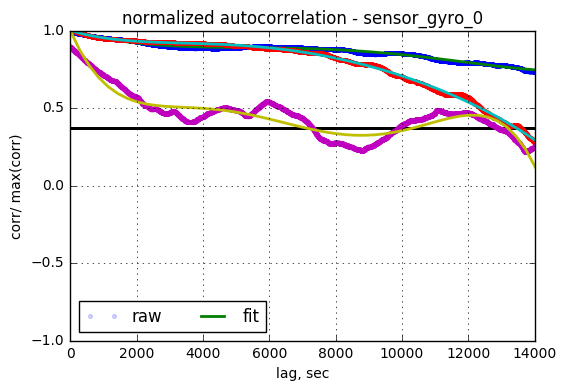

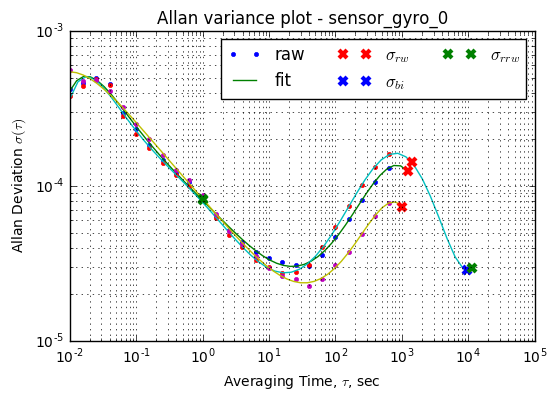

In [6]:
print('Starting analysis - Gyroscopes')

print('Gyroscope 0 - MPU6000')
px4tools.ulog.noise_analysis_sensor(d_gyro, topic='sensor_gyro_0', 
                                    allan_args={'poly_order':7, 'min_intervals':30})